# Fundamentals of Data Analytics - Project

***
## Loading the Tips Dataset

In [403]:
import seaborn as sns
sns.set(style="darkgrid") # Set the darkgrid style
import matplotlib.pyplot as plt
%matplotlib inline 
tips = sns.load_dataset("tips") # load tips dataset
import numpy as np # used for regression

***
## Description of the Tips Dataset

The tips dataset is built into the Seaborn python package and is used in the seaborn tutorial for examples of the many plotting features in the seaborn package. 

In [404]:
print('The tips dataset has ' + str(tips.shape[0]) + ' rows and ' + str(tips.shape[1]) + ' columns.')

The tips dataset has 244 rows and 7 columns.


The columns are total_bill, tip, sex, smoker, day, time and size.

In [405]:
cols = tips.columns # get the tips columns
cols

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

Each row of the dataset has an entry in the aforementioned columns. The total_bill column is the amount of  money spent on food/beverages. The tip column is the amount of tip given for the total bill. 
The sex column denotes the sex of the person paying the bill. I find this column a little unusual as it's so black and white. There are no instances of a party splitting the bill which is a common occurance.
The day column denotes the day of the week. 
The time column denotes the time of the dining sitting. 
The size column denotes the size of the dining party. 
The smoker column denotes the classification of the dining party as smoking or non smoking. Presumably this means that a member/members of the party was a smoker and the party was seated in the smoking section. This is not clear from the dataset. 

#### Check for missing Data
As you can see below, there is no missing data in the dataset i.e. no NaN or null values.

In [406]:
print(tips.isnull().sum()) # Adapted from https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ [1]
print(tips.isna().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [407]:
tips.head() # show the top 5 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [408]:
tips.tail() # show the last 5 rows

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [409]:
tips.describe()  # a description of the numerical columns

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The average total bill, tip and size is  is 19.78, 2.99 and 2.56 respectively.

In [410]:
tips.groupby('day').describe() # description of tips grouped by day, adapted from Reference [2]

total_bill                                                             \
          count       mean       std   min      25%    50%      75%    max   
day                                                                          
Thur       62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11   
Fri        19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17   
Sat        87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81   
Sun        76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17   

       tip            ...                 size                                \
     count      mean  ...     75%    max count      mean       std  min  25%   
day                   ...                                                      
Thur  62.0  2.771452  ...  3.3625   6.70  62.0  2.451613  1.066285  1.0  2.0   
Fri   19.0  2.734737  ...  3.3650   4.73  19.0  2.105263  0.567131  1.0  2.0   
Sat   87.0  2.993103  ...  3.3700  10.00  87.0  2.517241  0.819275  1.0  2.0   
Sun   76.0  3.255132  ...  4.0000   6.50  76.0  2.842105  1.007341  2.0  2.0   

                     
      50%  75%  max  
day                  
Thur  2.0  2.0  6.0  
Fri   2.0  2.0  4.0  
Sat   2.0  3.0  5.0  
Sun   2.0  4.0  6.0  

[4 rows x 24 columns]

Saturday has the most sittings (87) and Friday has the least (19). 

Sunday has the highest average total bill (21.41) and Friday has the lowest (17.15).

Sunday has the highest average tip (3.25) and Friday has the lowest (2.73).

Sunday has the highest average size (2.84) and Friday has the lowest (2.1)

In [411]:
tips.groupby(['day','time']).describe() # Description of tips grouped by day and time, adapted from [2]

total_bill                                                        \
                 count       mean       std    min      25%     50%      75%   
day  time                                                                      
Thur Lunch        61.0  17.664754  7.950334   7.51  12.4300  16.000  20.2700   
     Dinner        1.0  18.780000       NaN  18.78  18.7800  18.780  18.7800   
Fri  Lunch         7.0  12.845714  2.842228   8.58  11.1250  13.420  14.7000   
     Dinner       12.0  19.663333  9.471753   5.75  12.3525  18.665  23.8825   
Sat  Dinner       87.0  20.441379  9.480419   3.07  13.9050  18.240  24.7400   
Sun  Dinner       76.0  21.410000  8.832122   7.25  14.9875  19.630  25.5975   

                     tip            ...                size            \
               max count      mean  ...    75%    max count      mean   
day  time                           ...                                 
Thur Lunch   43.11  61.0  2.767705  ...  3.400   6.70  61.0  2.459016   
     Dinner  18.78   1.0  3.000000  ...  3.000   3.00   1.0  2.000000   
Fri  Lunch   16.27   7.0  2.382857  ...  2.750   3.48   7.0  2.000000   
     Dinner  40.17  12.0  2.940000  ...  3.625   4.73  12.0  2.166667   
Sat  Dinner  50.81  87.0  2.993103  ...  3.370  10.00  87.0  2.517241   
Sun  Dinner  48.17  76.0  3.255132  ...  4.000   6.50  76.0  2.842105   

                                                
                  std  min  25%  50%  75%  max  
day  time                                       
Thur Lunch   1.073526  1.0  2.0  2.0  2.0  6.0  
     Dinner       NaN  2.0  2.0  2.0  2.0  2.0  
Fri  Lunch   0.577350  1.0  2.0  2.0  2.0  3.0  
     Dinner  0.577350  2.0  2.0  2.0  2.0  4.0  
Sat  Dinner  0.819275  1.0  2.0  2.0  3.0  5.0  
Sun  Dinner  1.007341  2.0  2.0  2.0  4.0  6.0  

[6 rows x 24 columns]

If you group by Day and time, you get the follwing observations :

Saturday Dinner has the most sittings (87) and Thursday Dinner has the least (1).

Sunday Dinner has the highest average total bill (21.41) and Friday Lunch has the lowest (12.84).

Sunday Dinner has the highest average tip (3.25) and Friday Lunch has the lowest (2.38).

Sunday has the highest average size (2.84) and Friday Lunch and Thursday Dinne have the lowest (2.1)


In [412]:
tips.groupby('sex').describe() # description of tips grouped by sex

total_bill                                                         \
            count       mean       std   min    25%    50%    75%    max   
sex                                                                        
Male        157.0  20.744076  9.246469  7.25  14.00  18.35  24.71  50.81   
Female       87.0  18.056897  8.009209  3.07  12.75  16.40  21.52  44.30   

          tip            ...               size                                \
        count      mean  ...   75%   max  count      mean       std  min  25%   
sex                      ...                                                    
Male    157.0  3.089618  ...  3.76  10.0  157.0  2.630573  0.955997  1.0  2.0   
Female   87.0  2.833448  ...  3.50   6.5   87.0  2.459770  0.937644  1.0  2.0   

                       
        50%  75%  max  
sex                    
Male    2.0  3.0  6.0  
Female  2.0  3.0  6.0  

[2 rows x 24 columns]

If you group by sex, you get the follwing observations :

Male count (157) is almost twice the Female count (87).

Average total bill by sex is 20.74 (M) and 18.05 (F).

Average tip by sex is 3.08 (M) and 2.83 (F).

In [413]:
tips.groupby('smoker').describe() # description of tips grouped by smoker

total_bill                                                           \
            count       mean       std   min     25%    50%     75%    max   
smoker                                                                       
Yes          93.0  20.756344  9.832154  3.07  13.420  17.92  26.860  50.81   
No          151.0  19.188278  8.255582  7.25  13.325  17.59  22.755  48.33   

          tip            ...                size                           \
        count      mean  ...    75%   max  count      mean       std  min   
smoker                   ...                                                
Yes      93.0  3.008710  ...  3.680  10.0   93.0  2.408602  0.810751  1.0   
No      151.0  2.991854  ...  3.505   9.0  151.0  2.668874  1.017984  1.0   

                            
        25%  50%  75%  max  
smoker                      
Yes     2.0  2.0  3.0  5.0  
No      2.0  2.0  3.0  6.0  

[2 rows x 24 columns]

If you group by smoker, you get the follwing observations :

Count of Non-smokers outnumber smokers by 151 to 93.

Average total bill by smoker/non-smoker is 20.75 (S) and 19.18 (NS).

Average tip by smoker/non-smoker is 3 (S) and 2.99 (NS).



In [414]:
tips.groupby('size').describe() # description of tips grouped by size

total_bill                                                               \
          count       mean       std    min      25%     50%      75%    max   
size                                                                           
1           4.0   7.242500  3.010729   3.07   6.2050   7.915   8.9525  10.07   
2         156.0  16.448013  6.043729   5.75  12.4525  15.370  19.6900  40.55   
3          38.0  23.277632  9.407065  10.33  16.9400  20.365  27.7750  50.81   
4          37.0  28.613514  8.608603  16.49  21.5000  25.890  34.8100  48.33   
5           5.0  30.068000  7.340396  20.69  28.1500  29.850  30.4600  41.19   
6           4.0  34.830000  9.382000  27.05  29.1125  32.050  37.7675  48.17   

        tip                                                          
      count      mean       std   min     25%    50%     75%    max  
size                                                                 
1       4.0  1.437500  0.506516  1.00  1.0000  1.415  1.8525   1.92  
2     156.0  2.582308  0.985501  1.00  2.0000  2.500  3.1450   5.85  
3      38.0  3.393158  1.557344  1.36  2.3575  3.290  3.6825  10.00  
4      37.0  4.135405  1.640668  2.00  3.0000  3.760  5.0700   9.00  
5       5.0  4.028000  1.440111  2.00  3.0000  5.000  5.0000   5.14  
6       4.0  5.225000  1.053170  4.20  4.8000  5.000  5.4250   6.70

If you group by size, you get the follwing observations :

size of 2 is by far the most common with a count of 156.

As you would expect, the average total bill for each size is proportional to the size of the table (bigger table equals bigger bills).

Similary you caould say the same about the average tip size, with the excpetion that the average tip size for size 4 is bigger than average tip for size 5.

In [415]:
days = tips.day.unique() # find the unique opening days
# find the unique sittings
thur = tips.loc[tips.loc[:, 'day'] == 'Thur'] # DataFrame for Thurday 
thur = thur.time.unique() # unique sittings for Thursday
fri = tips.loc[tips.loc[:, 'day'] == 'Fri'] # DataFrame for Friday
fri = fri.time.unique() # unique sittings for Friday
sat = tips.loc[tips.loc[:, 'day'] == 'Sat'] # DataFrame for Saturday
sat = sat.time.unique() # unique sittings for Saturday
sun = tips.loc[tips.loc[:, 'day'] == 'Sun'] # DataFrame for Sunday
sun = sun.time.unique() # unique sittings for Sunday

print('The restaurant is open the following days : ' + days[0] + 'day, ' + days[1] + 'urday, ' + days[2] + 'sday, and ' + days[3] + 'day.\n')
print('Thursday opening: ')
print(thur[0] + ' & ' + thur[1] + '\n')
print('Friday opening: ')
print(fri[0] + ' & ' + fri[1] + '\n')
print('Saturday opening: ')
print(sat[0] + '\n')
print('Sunday opening: ')
print(sun[0])


The restaurant is open the following days : Sunday, Saturday, Thursday, and Friday.

Thursday opening: 
Lunch & Dinner

Friday opening: 
Dinner & Lunch

Saturday opening: 
Dinner

Sunday opening: 
Dinner


A table with the sittings :

| Sitting | Thursday | Friday | Saturday | Sunday | 
|---------|----------|--------|----------|--------| 
| Lunch   | X        | X      |          |        | 
| Dinner  | X        | X      | X        | X      | 

#### Means of total bill, tip and size grouped by day and time

In [416]:
means = tips.groupby('day').mean() # Adapted from https://www.youtube.com/watch?foo=bar&v=_T8LGqJtuGc , Wes McKinney: pandas in 10 minutes | Walkthrough [2]
means # The mean total_bill, tip and size grouped by day

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


The table of means suggests that Sunday is the most lucrative day for earning tips. 

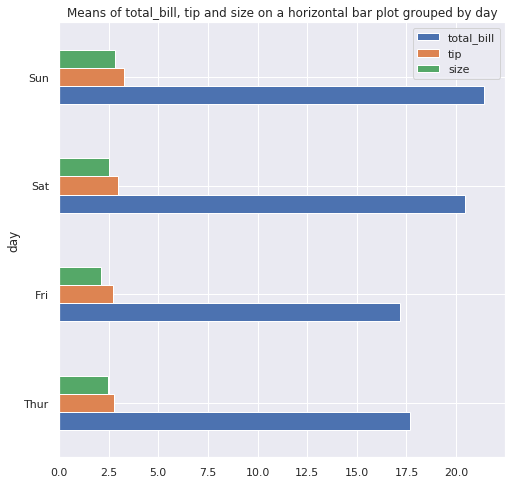

In [417]:
means.plot.barh(figsize=(8,8))# Adapted from Reference [2] . Horizontal bar plot of mean total_bill, tip and size by day. figsize adapted from https://stackoverflow.com/a/51174822 
plt.title("Means of total_bill, tip and size on a horizontal bar plot grouped by day");


In [418]:
means_by_sitting = tips.groupby(['day','time']).mean() # Adapted from Reference [2]
means_by_sitting #  mean total_bill, tip and size grouped by day and time

total_bill       tip      size
day  time                                  
Thur Lunch    17.664754  2.767705  2.459016
     Dinner   18.780000  3.000000  2.000000
Fri  Lunch    12.845714  2.382857  2.000000
     Dinner   19.663333  2.940000  2.166667
Sat  Lunch          NaN       NaN       NaN
     Dinner   20.441379  2.993103  2.517241
Sun  Lunch          NaN       NaN       NaN
     Dinner   21.410000  3.255132  2.842105

As you can see from the table above, there were no lunch sittings on Saturday or Sunday. 

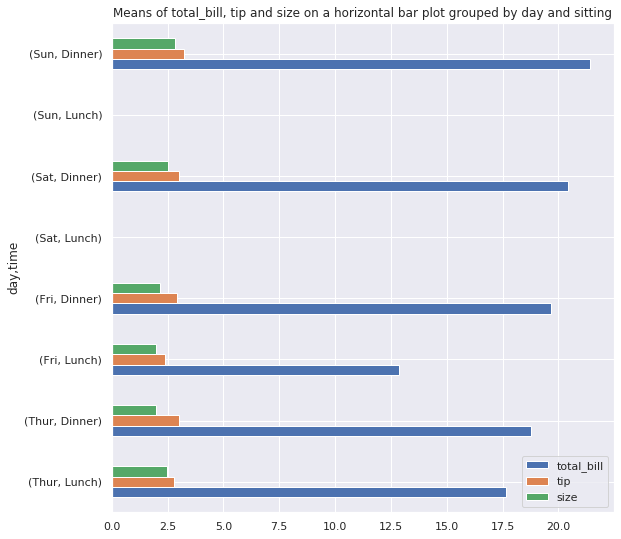

In [419]:
means_by_sitting.plot.barh(figsize=(9,9)) # Horizontal bar plot of  mean total_bill, tips and size grouped by day and time.
plt.title("Means of total_bill, tip and size on a horizontal bar plot grouped by day and sitting");

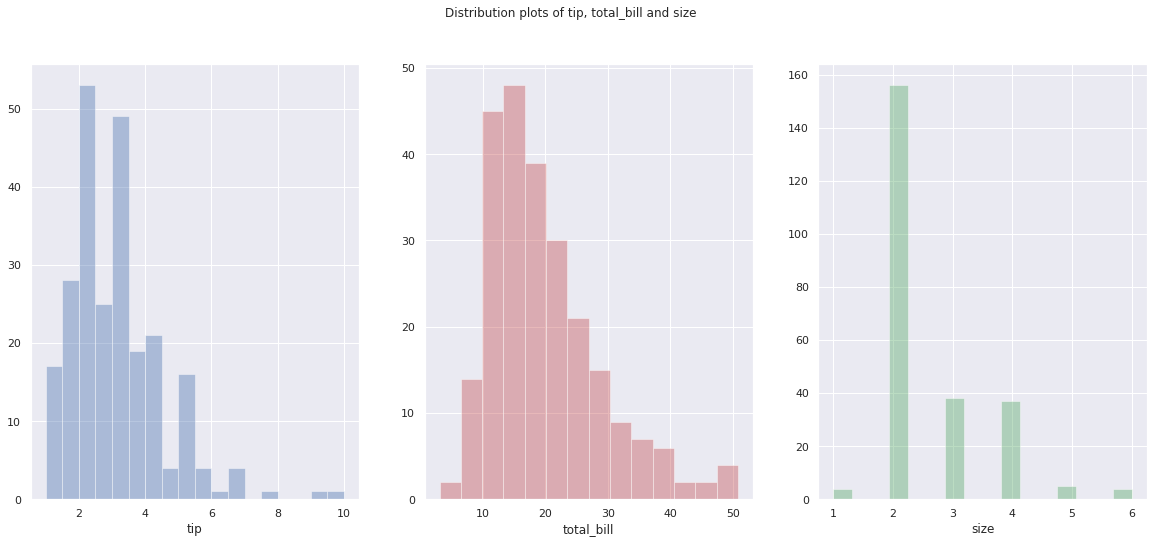

In [420]:
f, axes = plt.subplots(1,3, figsize=(20,8)) # Adapted from https://seaborn.pydata.org/examples/distplot_options.html
sns.distplot(tips['tip'],kde=False,color="b", ax=axes[0]) # Distribution plot of tip, no kde and colour blue
sns.distplot(tips['total_bill'],kde=False,color="r", ax=axes[1]) # Distribution plot of total bill, no kde and colour red
sns.distplot(tips['size'],kde=False,color="g", ax=axes[2]) # Distribution plot of size, no kde and colour green
plt.suptitle('Distribution plots of tip, total_bill and size');

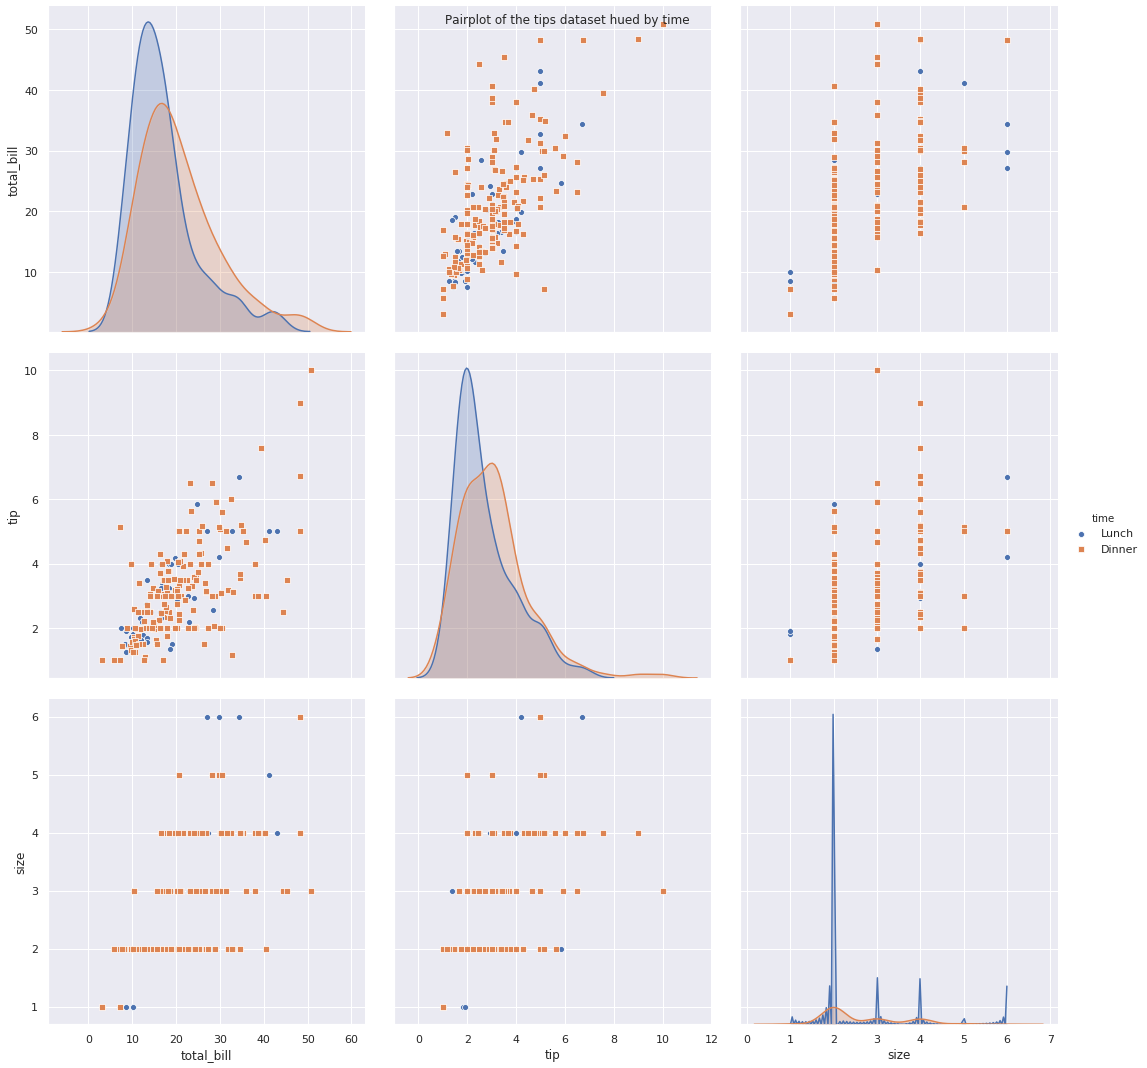

In [421]:
sns.pairplot(tips,hue='time',markers=["o","s"],height=5) # Pairplot of tips with time hued, markers and height increased for better clarity. Adapted from https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot
plt.suptitle('Pairplot of the tips dataset hued by time');

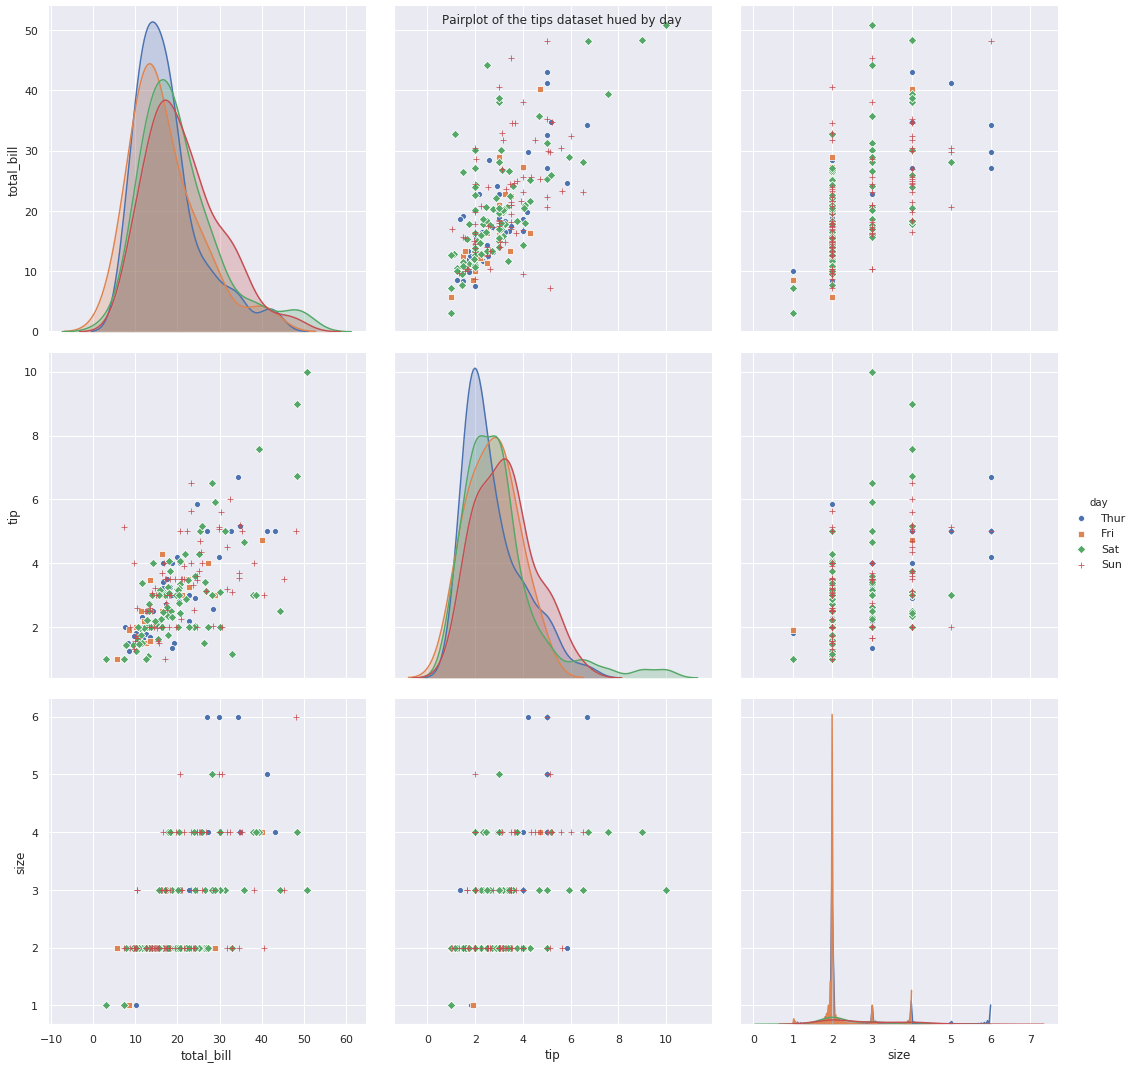

In [422]:
sns.pairplot(tips,hue='day',markers=["o","s","D","+"],height=5); # Pairplot of tips with day hued and height increased. Adapted from https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot
plt.suptitle('Pairplot of the tips dataset hued by day');

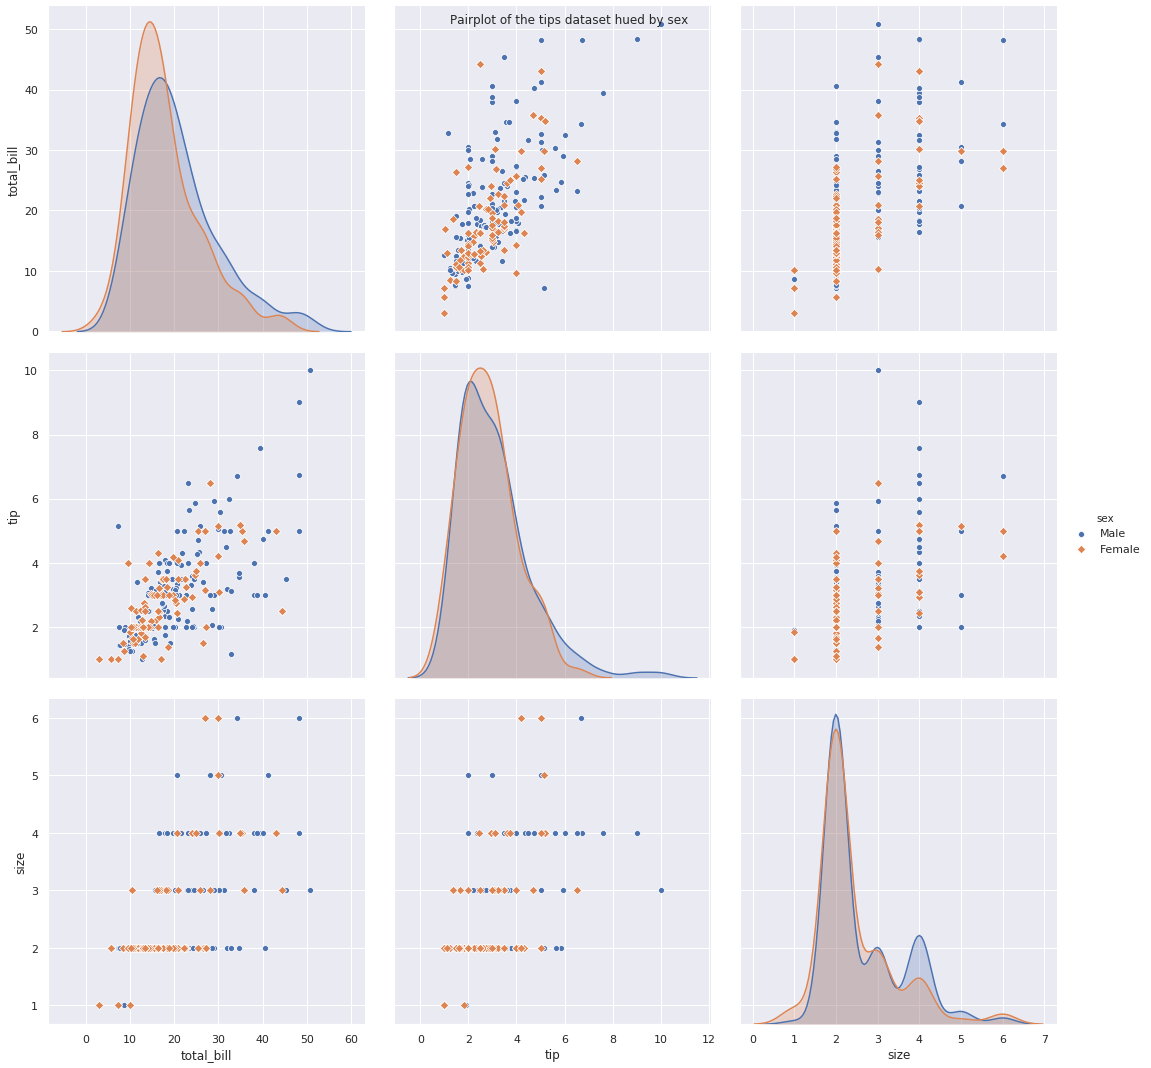

In [423]:
sns.pairplot(tips,hue='sex',markers=["o","D"],height=5); # Pairplot of tips with sex hued and height increased. Adapted from https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot
plt.suptitle('Pairplot of the tips dataset hued by sex');

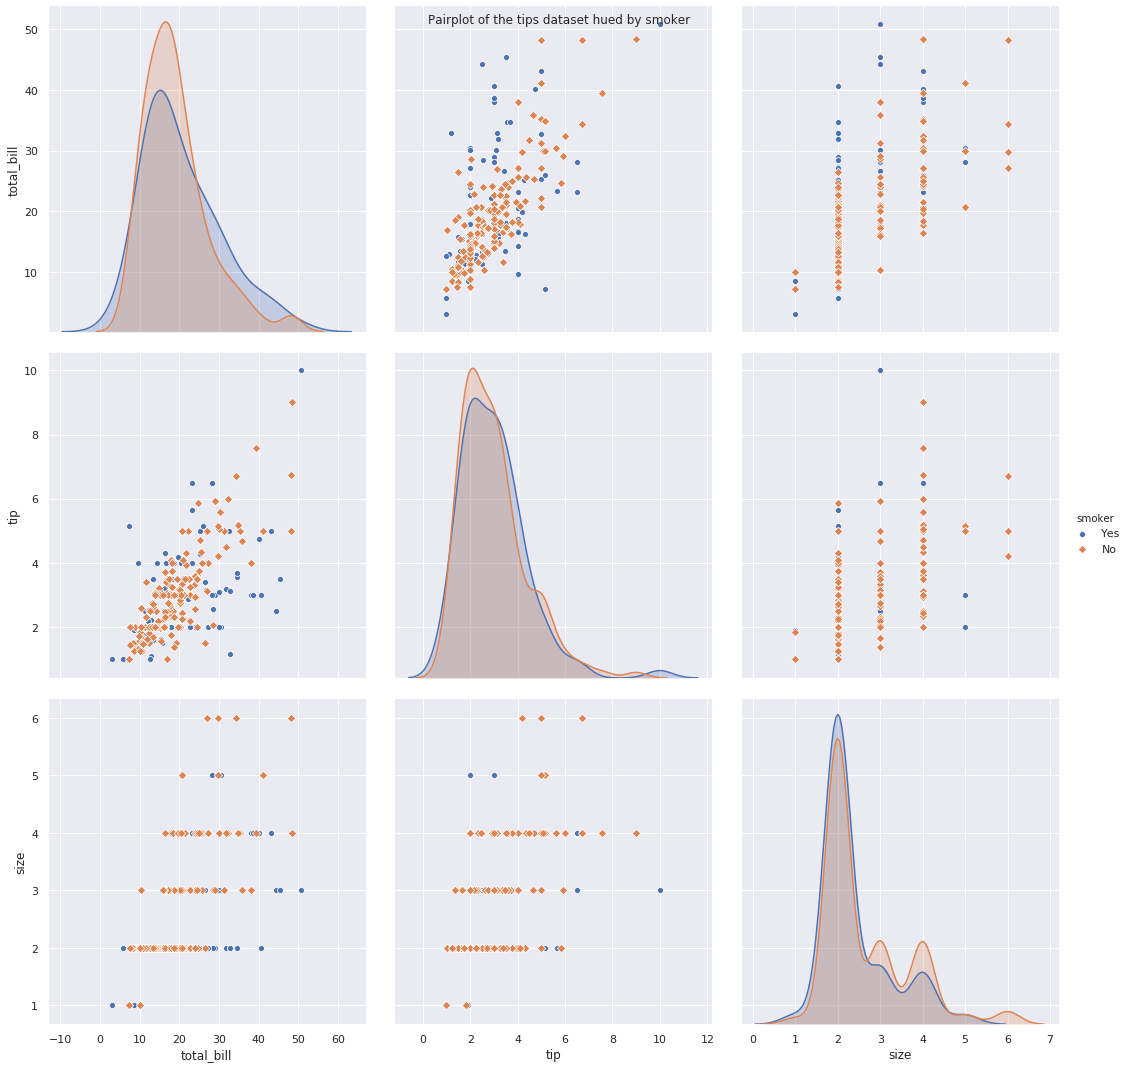

In [424]:
sns.pairplot(tips,hue='smoker',markers=["o","D"],height=5); # Pairplot of tips with smoker hued and height increased. Adapted from https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot
plt.suptitle('Pairplot of the tips dataset hued by smoker');

In [425]:
tips['size'].min() # The smallest party that was catered for.

1

In [426]:
tips['size'].max() # The largest party that was catered for.

6

In [427]:
tips['size'].unique() # The range of part sizes that was catered for.

array([2, 3, 4, 1, 6, 5])

In [428]:
tips.tip.max() # The maximum tip given.

10.0

In [429]:
tips.tip.min() # The smallest tip given

1.0

In [430]:
tips.total_bill.min() # the smallest bill

3.07

In [431]:
tips.total_bill.max() # the maximum bill

50.81

In [432]:
# Total tips as a % of all bills
(tips.tip.sum()/tips.total_bill.sum())*100

15.153580224410025

Below is some swarm plots. The swarm plot gives a good visual breakdown of the distribution of the variables.

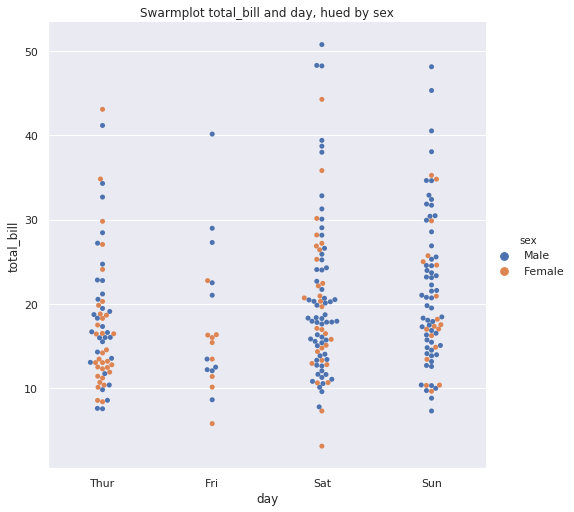

In [479]:
sns.catplot(x="day", y="total_bill",hue="sex", data=tips,kind="swarm",height=7) # Swarmplot of total_bill and day hued by sex. Resizing adapted from https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib
plt.title('Swarmplot total_bill and day, hued by sex');

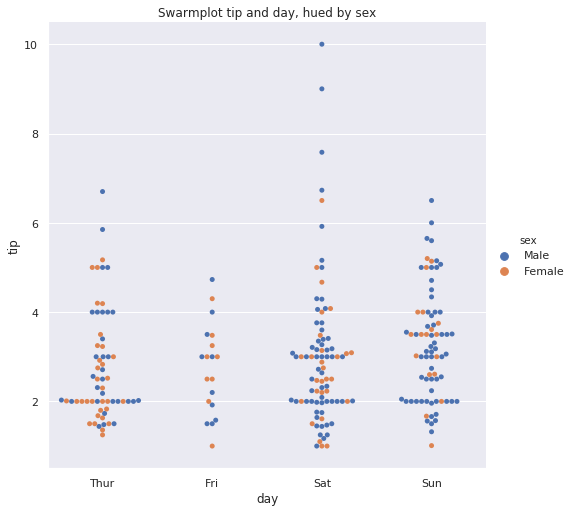

In [480]:
sns.catplot(x="day", y="tip",hue="sex", data=tips,kind="swarm",height=7) # Swarmplot of tip and day hued by sex.
plt.title('Swarmplot tip and day, hued by sex');

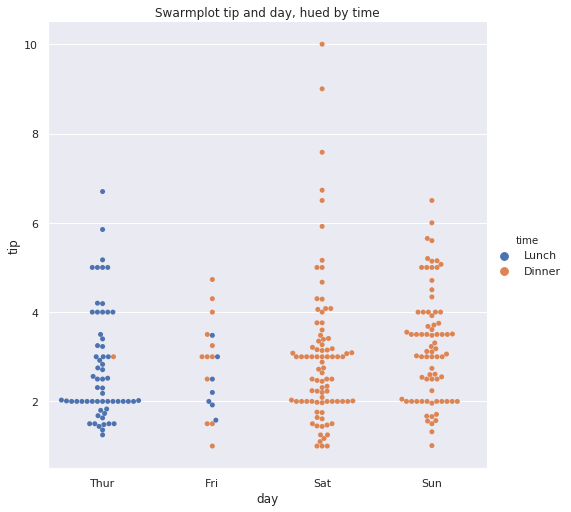

In [481]:
sns.catplot(x="day", y="tip",hue="time", data=tips,kind="swarm",height=7); # Swarmplot of tip and day hued by time.
plt.title('Swarmplot tip and day, hued by time');

### Tipped %

Although not in the dataset, the tipped percentage is a universally known variable when it comes to dining and tipping.

In [436]:
# Make a new column with % of tip/bill size.
tips['Tipped%'] = (tips['tip']/tips['total_bill'])*100
tips['Tipped%'].describe()

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: Tipped%, dtype: float64

As you can see the mean of the Tipped% (16.08) is greater than the percentage sum of all tips divided by the total bill 15.15%.

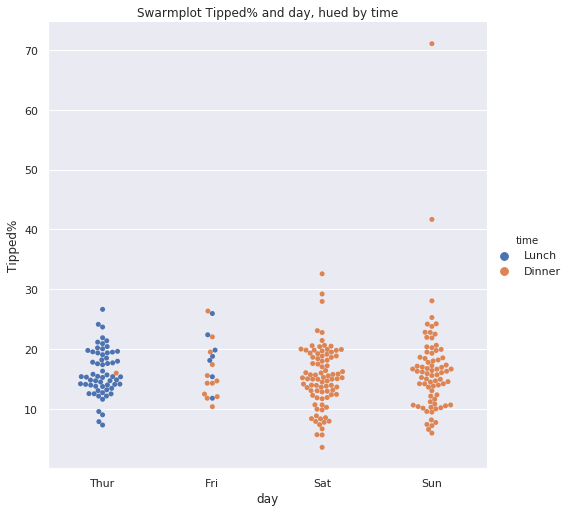

In [482]:
sns.catplot(x="day", y="Tipped%",hue="time", data=tips,kind="swarm",height=7); # Swarmplot of tipped% and day hued by time.
plt.title('Swarmplot Tipped% and day, hued by time');

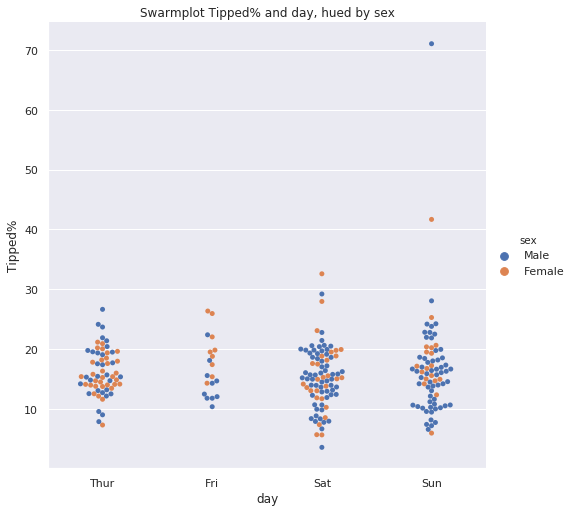

In [483]:
sns.catplot(x="day", y="Tipped%",hue="sex", data=tips,kind="swarm",height=7);# Swarmplot of tipped% and day hued by sex.
plt.title('Swarmplot Tipped% and day, hued by sex');

***
## F - Distribution test (Male versus Female)
adapted from - Hypothesis Testing by Hand: An f-Test for the Differences bewteen Two Population Variances - Part 1 [3]

An F test for the difference between two population variances. In this test we will test the variances in the male and female populations. Earlier a new 'Tipped%' varaible was derived. This is the ratio of tip to total bill, expressed as a percent. This test will analyse the variance of the tipped percentage within these two populations.

### Female Sample description

In [439]:
female = tips.loc[tips.loc[:,'sex'] == 'Female'] # new dataframe with female population
female.describe() # statistical description of the female population

,total_bill,tip,size,Tipped%
count,87.000000,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770,16.649074
std,8.009209,1.159495,0.937644,5.363173
min,3.070000,1.000000,1.000000,5.643341
25%,12.750000,2.000000,2.000000,14.041645
50%,16.400000,2.750000,2.000000,15.558149
75%,21.520000,3.500000,3.000000,19.426621
max,44.300000,6.500000,6.000000,41.666667


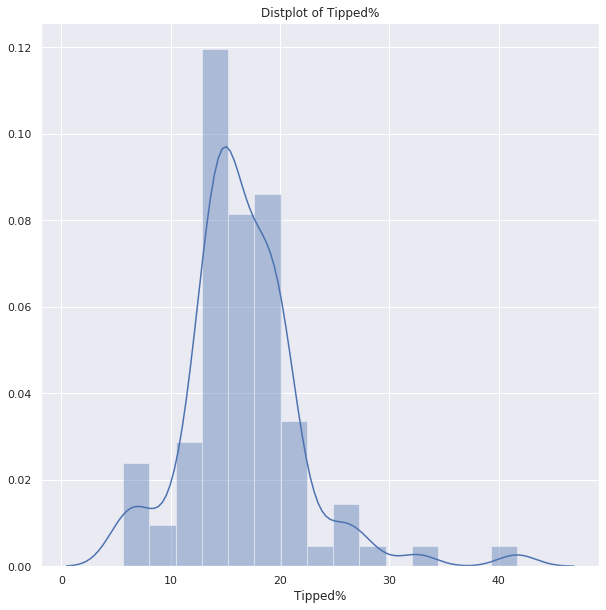

In [487]:
plt.figure(figsize=(10,10))
sns.distplot(female['Tipped%']) # distribution plot of the female Tipped%
plt.title('Distplot of Tipped%');

In [441]:
mean1 = female['Tipped%'].mean() # mean to be used in F test
var1 = female['Tipped%'].var() # variance to be used in F test
n1 = female['Tipped%'].count() # count number of samples, to be used in F test

### Male Sample description

In [442]:
male = tips.loc[tips.loc[:,'sex'] == 'Male'] # new dataframe with male population
male.describe() # statistical description of the male population

,total_bill,tip,size,Tipped%
count,157.000000,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573,15.765055
std,9.246469,1.489102,0.955997,6.477787
min,7.250000,1.000000,1.000000,3.563814
25%,14.000000,2.000000,2.000000,12.138869
50%,18.350000,3.000000,2.000000,15.349194
75%,24.710000,3.760000,3.000000,18.623962
max,50.810000,10.000000,6.000000,71.034483


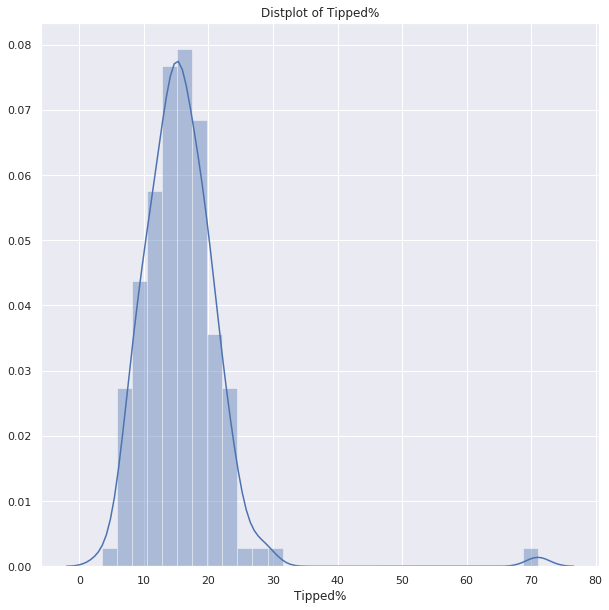

In [489]:
plt.figure(figsize=(10,10))
sns.distplot(male['Tipped%']) # distribution plot of the male Tipped%
plt.title('Distplot of Tipped%');

In [444]:
mean2 = male['Tipped%'].mean() # mean to be used in F test
var2 = male['Tipped%'].var() # variance to be used in F test
n2 = male['Tipped%'].count() # count number of samples, to be used in F test

### F test procedure
    1. Hypothesis

$H_{0}: \delta_{1}^{2} = \delta_{2}^{2} $

$H_{a}: \delta_{1}^{2} \neq \delta_{2}^{2} $

    2. Significance Level (Two tailed)
    
$ \alpha = 0.05 $

    3. Test Statistic
    
$ F = \frac{s_{2}^{2}}{s_{1}^{2}} $
        


In [445]:
fstatistic = var2/var1 # Calculate the F statistic
fstatistic

1.4588472200534603

    4. Critical Values
  As this is a two tailed test with we must use the following parameters in the F distribution tables:
  
$ \frac{\alpha}{2}$

$df_{1} = n1 - 1 = 157 - 1 = 156$ , where df1 is the first degree on freedom.

$df_{2} = n2 -1 = 87 -1 = 86$ , where df2 is the second degree of freedom.

df1 and df2 are used to select the correct row and column in the F tables.

Using the above parameters from the F tables, we get a critical value (C) of 1.581.

    5. Decision
    
Clearly F is not bigger than C. As such, there is insufficient evidence at 5% significance level to reject the null hypothesis, in favour of the alternative hypothesis. We can continue under the assumption of equal population variances of Tipped%, in the male and female population.

***
## F - Distribution test (Smoker versus Non-Smoker)
adapted from - Hypothesis Testing by Hand: An f-Test for the Differences bewteen Two Population Variances - Part 1 [3]

An F test for the difference between two population variances. In this test we will test the variances in the smoker and non-smoker populations. This test will analyse variance of the tipped percent variable within these two populations.

### Smoker Sample description

In [446]:
smoker = tips.loc[tips.loc[:,'smoker'] == 'Yes'] # new dataframe with smoker population
smoker.describe() # statistical description of the smoker population

,total_bill,tip,size,Tipped%
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319604
std,9.832154,1.401468,0.810751,8.511920
min,3.070000,1.000000,1.000000,3.563814
25%,13.420000,2.000000,2.000000,10.677083
50%,17.920000,3.000000,2.000000,15.384615
75%,26.860000,3.680000,3.000000,19.505852
max,50.810000,10.000000,5.000000,71.034483


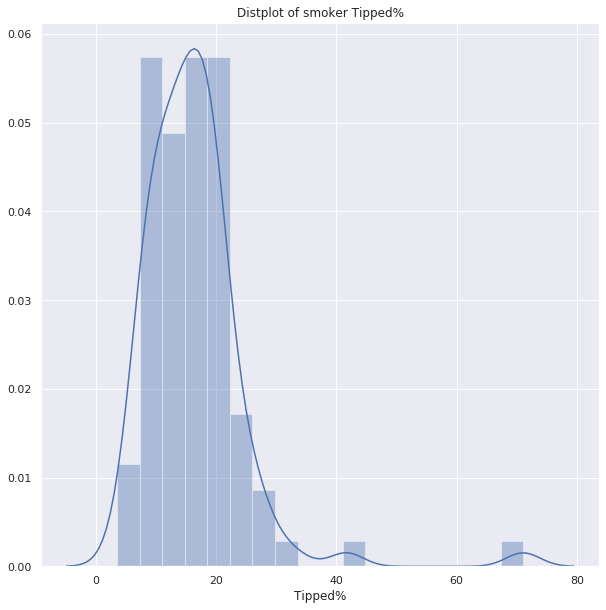

In [492]:
plt.figure(figsize=(10,10))
sns.distplot(smoker['Tipped%']) # distribution plot of the smoker Tipped%
plt.title('Distplot of smoker Tipped%');

In [448]:
mean1 = smoker['Tipped%'].mean() # mean to be used in F test
var1 = smoker['Tipped%'].var() # variance to be used in F test
n1 = smoker['Tipped%'].count() # count number of samples, to be used in F test

### Non-Smoker Sample description

In [449]:
nonsmoker = tips.loc[tips.loc[:,'smoker'] == 'No'] # new dataframe with non-smoker population
nonsmoker.describe() # statistical description of the non-smoker population

,total_bill,tip,size,Tipped%
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932846
std,8.255582,1.377190,1.017984,3.990977
min,7.250000,1.000000,1.000000,5.679667
25%,13.325000,2.000000,2.000000,13.690561
50%,17.590000,2.740000,2.000000,15.562472
75%,22.755000,3.505000,3.000000,18.501403
max,48.330000,9.000000,6.000000,29.198966


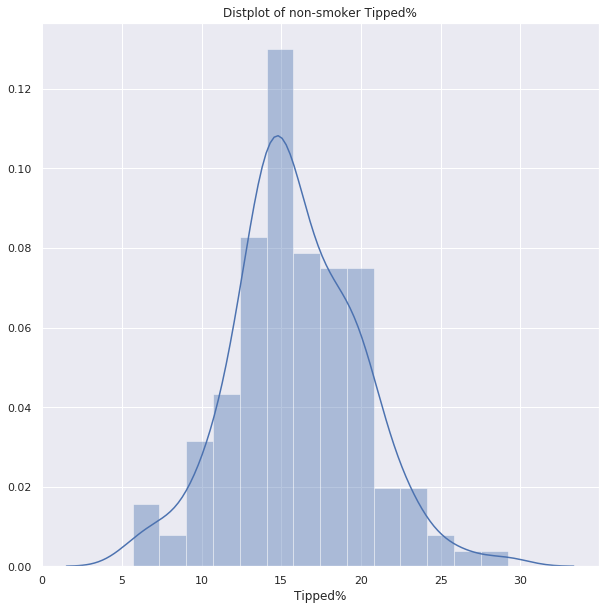

In [491]:
plt.figure(figsize=(10,10))
sns.distplot(nonsmoker['Tipped%']) # distribution plot of the non-smoker Tipped%
plt.title('Distplot of non-smoker Tipped%');

In [451]:
mean2 = nonsmoker['Tipped%'].mean() # mean to be used in F test
var2 = nonsmoker['Tipped%'].var() # variance to be used in F test
n2 = nonsmoker['Tipped%'].count() # count number of samples, to be used in F test

### F test procedure
    1. Hypothesis (Same as above section)

$H_{0}: \delta_{1}^{2} = \delta_{2}^{2} $

$H_{a}: \delta_{1}^{2} \neq \delta_{2}^{2} $

    2. Significance Level (Two tailed)
    
$ \alpha = 0.05 $

    3. Test Statistic
    
$ F = \frac{s_{2}^{2}}{s_{1}^{2}} $

In [452]:
fstatistic = var1/var2 # Calculate the F statistic. Larger variance as numerator.
fstatistic

4.5487982706302

    4. Critical Values
  As this is a two tailed test with we must use the following parameters in the F distribution tables:
  
$ \frac{\alpha}{2}$

$df_{1} = n2 - 1 = 93 - 1 = 92$

$df_{2} = n1 -1 =151 -1 = 150$

Using the above parameters from the F tables, we get a critical value (C) of 1.433.

    5. Decision
    
Clearly F is bigger than C. As such, there is sufficient evidence at 5% significance level to reject the null hypothesis, in favour of the alternative hypothesis. We can continue under the assumption of unequal population variance of Tipped%, in the smoker and non-smoker population.

***
## Regression of total_bill and tip amount

I will do a regression to see of there is a relationship between the total_bill and tip variables.

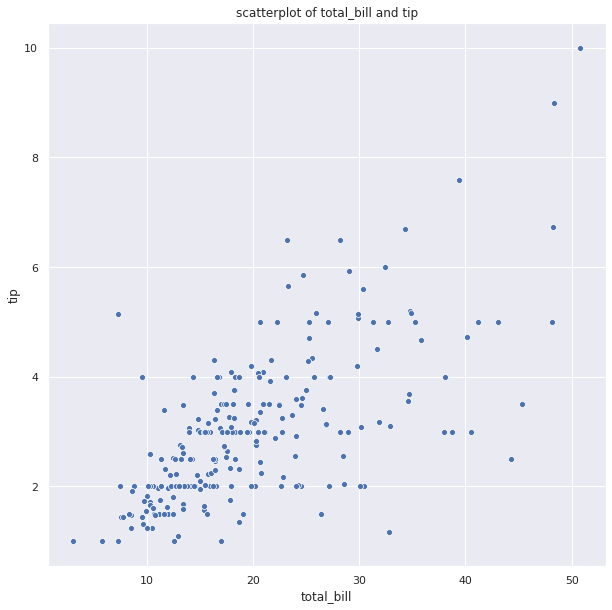

In [494]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="total_bill",y="tip",data=tips) # a scatterplot of total bill and tip
plt.title('scatterplot of total_bill and tip');

The plot above shows there might be a linear relationship between tip and total bill. I will investigate this below.

In [454]:
# Calculate the best values for m and c. Adapted from https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

# First calculate the means of x and y.
x_avg = tips['total_bill'].mean()
y_avg = tips['tip'].mean()

# Subtract means from x and y.
x_zero = tips['total_bill'] - x_avg
y_zero = tips['tip'] - y_avg

# The best m is found by the following calculation.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Use m from above to calculate the best c.
c = y_avg - m * x_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.105025 and c is 0.920270.


In [455]:
# Double checking my calculations using numpy polyfit
np.polyfit(tips['total_bill'],tips['tip'],1)

array([0.10502452, 0.92026961])

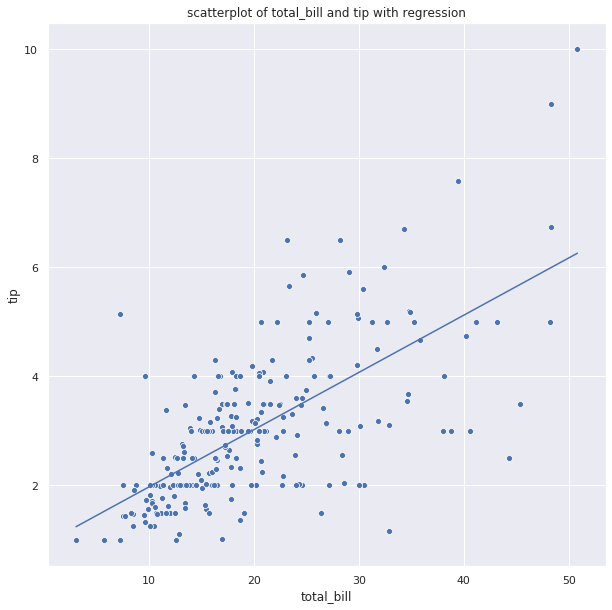

In [495]:
#f, axes = plt.subplots(1,2, figsize=(20,8))
plt.figure(figsize=(10,10))
tips.loc[:,'mx+c'] = tips.loc[:,'total_bill'] * m + c # y = mx + c
sns.lineplot(x="total_bill",y="mx+c", data=tips) # draw line representing the regression fit
sns.scatterplot(x="total_bill",y="tip",data=tips) # draw the original plot
#sns.regplot(x="total_bill",y="tip",data=tips,ax=axes[1],fit_reg=True,ci=None); Used this to check my graph.
plt.title('scatterplot of total_bill and tip with regression');

As we can see in the plot above, we can fit a line showing a linear relationship between total bill and tip. There are a few points relatively far from the fitted line but there is quite a good fit.

***
### Regression of total_bill and tip amount for smokers/non-smokers

I will do a regression to see of there is a relationship between the total_bill and tip variables for smokers/non-smokers.

In [457]:
# Calculate the best values for m and c for smokers. Adapted from https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

# First calculate the means of x and y.
smoker_x_avg = smoker['total_bill'].mean()
smoker_y_avg = smoker['tip'].mean()

# Subtract means from x and y.
smoker_x_zero = smoker['total_bill'] - smoker_x_avg
smoker_y_zero = smoker['tip'] - smoker_y_avg

# The best m is found by the following calculation.
sm = np.sum(smoker_x_zero * smoker_y_zero) / np.sum(smoker_x_zero * smoker_x_zero)
# Use m from above to calculate the best c.
sc = smoker_y_avg - sm * smoker_x_avg

print("m is %8.6f and c is %6.6f." % (sm, sc))

m is 0.069590 and c is 1.564271.


In [458]:
# Double checking my calculations using numpy polyfit
np.polyfit(smoker['total_bill'],smoker['tip'],1)

array([0.0695902 , 1.56427146])

In [459]:
# Calculate the best values for m and c for non-smokers. Adapted from https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

# First calculate the means of x and y.
nonsmoker_x_avg = nonsmoker['total_bill'].mean()
nonsmoker_y_avg = nonsmoker['tip'].mean()

# Subtract means from x and y.
nonsmoker_x_zero = nonsmoker['total_bill'] - nonsmoker_x_avg
nonsmoker_y_zero = nonsmoker['tip'] - nonsmoker_y_avg

# The best m is found by the following calculation.
nsm = np.sum(nonsmoker_x_zero * nonsmoker_y_zero) / np.sum(nonsmoker_x_zero * nonsmoker_x_zero)
# Use m from above to calculate the best c.
nsc = nonsmoker_y_avg - nsm * nonsmoker_x_avg

print("m is %8.6f and c is %6.6f." % (nsm, nsc))

m is 0.137156 and c is 0.360069.


In [460]:
# Double checking my calculations using numpy polyfit
np.polyfit(nonsmoker['total_bill'],nonsmoker['tip'],1)

array([0.1371559 , 0.36006874])

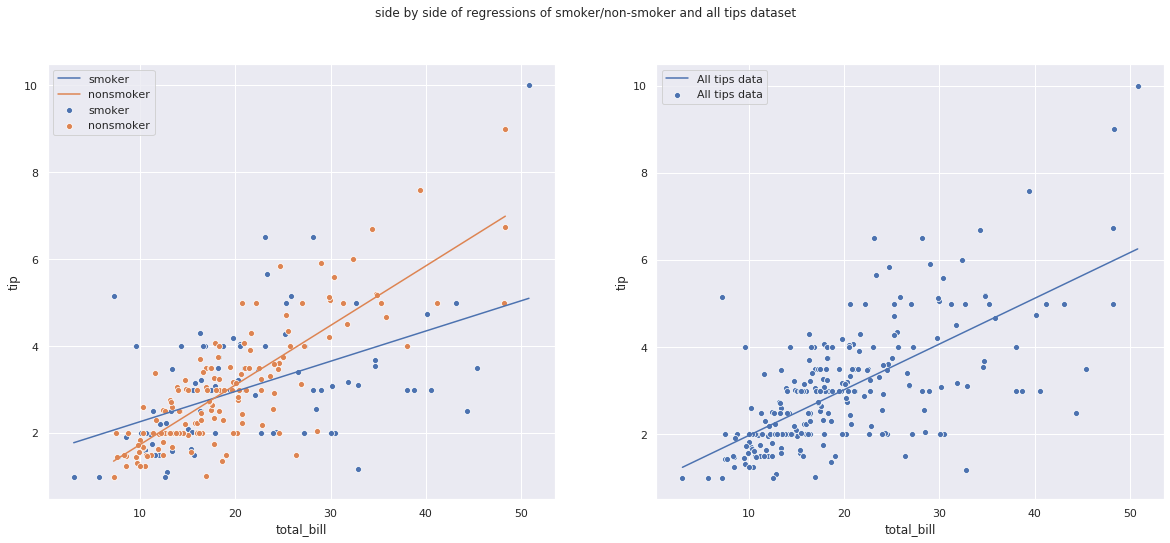

In [497]:
f, axes = plt.subplots(1,2, figsize=(20,8)) # Create a figure with 2 subplots and enlarge the figure size

smoker.loc[:,'mx+c'] = smoker.loc[:,'total_bill'] * sm + sc # y = mx + c
nonsmoker.loc[:,'mx+c'] = nonsmoker.loc[:,'total_bill'] * nsm + nsc # y = mx + c
sns.lineplot(x="total_bill",y="mx+c", data=smoker,ax=axes[0],label="smoker") # make a lineplot for smoker on axes 0
sns.scatterplot(x="total_bill",y="tip",data=smoker,ax=axes[0],label="smoker") # make a scatterplot for smoker on axes 0
sns.lineplot(x="total_bill",y="mx+c", data=nonsmoker,ax=axes[0],label="nonsmoker") # make a lineplot for non-smoker on axes 0
sns.scatterplot(x="total_bill",y="tip",data=nonsmoker,ax=axes[0],label="nonsmoker") # make a scatterplot for non-smoker on axes 0
sns.lineplot(x="total_bill",y="mx+c", data=tips,ax=axes[1],label="All tips data") # For comparison make a lineplot for whole dataset on axes 1 # make a lineplot for smoker on axes 0
sns.scatterplot(x="total_bill",y="tip",data=tips,ax=axes[1],label="All tips data") # For comparison make a scatterplot for whole dataset on axes 1 
plt.suptitle('side by side of regressions of smoker/non-smoker and all tips dataset ');

There is a noticeable difference in the slope of the non-smoker and smoker fitted linear regression. This reinforces the conclusion (unequal population variance of Tipped% in the smoker/non-smoker sample ) of the F-Test above.

***
### Regression of total_bill and tip amount for females/males

I will do a regression to see of there is a relationship between the total_bill and tip variables for male/female populations.

In [462]:
# Calculate the best values for m and c for females. Adapted from https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

# First calculate the means of x and y.
female_x_avg = female['total_bill'].mean()
female_y_avg = female['tip'].mean()

# Subtract means from x and y.
female_x_zero = female['total_bill'] - female_x_avg
female_y_zero = female['tip'] - female_y_avg

# The best m is found by the following calculation.
fm = np.sum(female_x_zero * female_y_zero) / np.sum(female_x_zero * female_x_zero)
# Use m from above to calculate the best c.
fc = female_y_avg - fm * female_x_avg

print("m is %8.6f and c is %6.6f." % (fm, fc))

m is 0.098878 and c is 1.048020.


In [463]:
# Double checking my calculations using numpy polyfit
np.polyfit(female['total_bill'],female['tip'],1)

array([0.09887792, 1.0480199 ])

In [464]:
# Calculate the best values for m and c for males. Adapted from https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/simple-linear-regression.ipynb

# First calculate the means of x and y.
male_x_avg = male['total_bill'].mean()
male_y_avg = male['tip'].mean()

# Subtract means from x and y.
male_x_zero = male['total_bill'] - male_x_avg
male_y_zero = male['tip'] - male_y_avg

# The best m is found by the following calculation.
mm = np.sum(male_x_zero * male_y_zero) / np.sum(male_x_zero * male_x_zero)
# Use m from above to calculate the best c.
mc = male_y_avg - mm * male_x_avg

print("m is %8.6f and c is %6.6f." % (mm,mc))

m is 0.107861 and c is 0.852148.


In [465]:
# Double checking my calculations using numpy polyfit
np.polyfit(male['total_bill'],male['tip'],1)

array([0.10786068, 0.85214769])

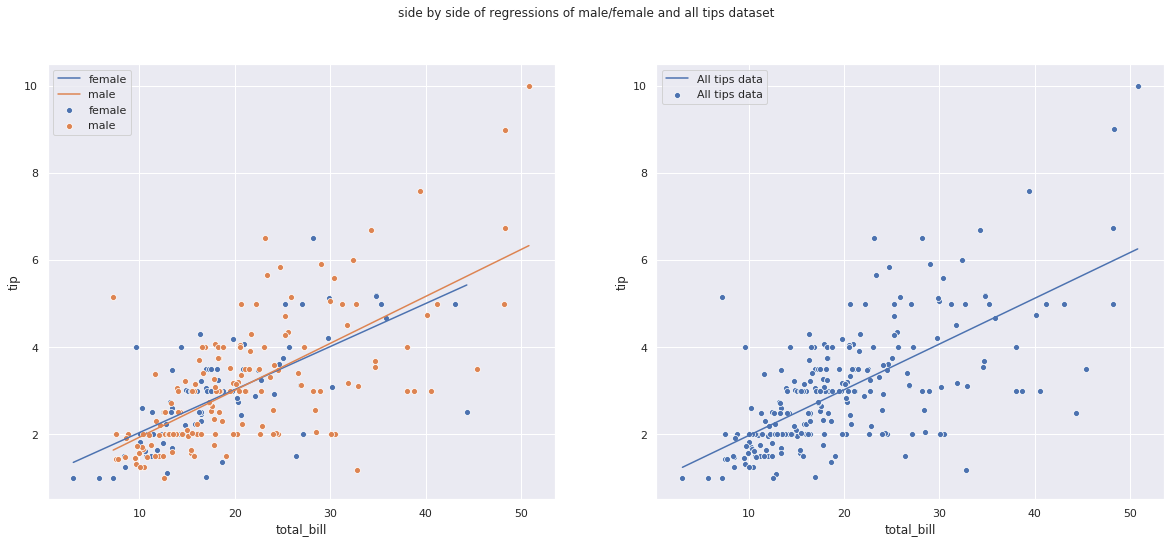

In [498]:
f, axes = plt.subplots(1,2, figsize=(20,8))
female.loc[:,'mx+c'] = female.loc[:,'total_bill'] * fm + fc
male.loc[:,'mx+c'] = male.loc[:,'total_bill'] * mm + mc
sns.lineplot(x="total_bill",y="mx+c", data=female,ax=axes[0],label="female")
sns.scatterplot(x="total_bill",y="tip",data=female,ax=axes[0],label="female")
sns.lineplot(x="total_bill",y="mx+c", data=male,ax=axes[0],label="male")
sns.scatterplot(x="total_bill",y="tip",data=male,ax=axes[0],label="male")
sns.lineplot(x="total_bill",y="mx+c", data=tips,ax=axes[1],label="All tips data")
sns.scatterplot(x="total_bill",y="tip",data=tips,ax=axes[1],label="All tips data")
plt.suptitle('side by side of regressions of male/female and all tips dataset ');

There is little difference in the slope of the male/female fitted linear regression. This reinforces the conclusion (equal population variance of Tipped% in the male and female sample) of the F-Test above.

***
## References

[1] How to Check If Any Value is NaN in a Pandas DataFrame -  https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

[2] Wes McKinney: pandas in 10 minutes | Walkthrough - https://www.youtube.com/watch?foo=bar&v=_T8LGqJtuGc

[3] Hypothesis Testing by Hand: An f-Test for the Differences bewteen Two Population Variances - Part 1 https://www.youtube.com/watch?v=9nwrCi-HLOE&list=FLIqzmD-jUugIGex7-lhJ3Pw&index=1

# End
***